Билет 175. Вариант 5. Датасет: https://www.kaggle.com/lodetomasi1995/income-classification

#### Библиотеки

In [14]:
import pandas as pd
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Загрузка данных

In [2]:
df = pd.read_csv('data/income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Колонки отображаются корректно

#### Задача прогнозирования - определить, зарабатывает ли человек более 50 тыс. в год. --> Задача бинарной классификации

Колонки:
age -  возраст

workclass - (Рабочий класс) Частный, самоокупаемый, самоокупаемый, Федеральное правительство, Местное правительство, правительство штата, без оплаты, никогда не работал

education -  образование

marital-status - семейное положение

occupation - Техническая поддержка, Ремесленный ремонт, Другое обслуживание, Продажи, Исполнительный менеджмент, Профильная специальность, Обработчики-уборщики, Машинная инспекция, Адм-канцелярский, Сельское хозяйство-рыболовство, Транспорт-переезд, Частный дом-серв, Охрана-серв, Вооруженные Силы.

relationship - Жена, Собственный ребенок, Муж, Не член семьи, Другой родственник, Не состоит в браке.

race -  белый, азиат-пак-островитянин, амер-индеец-эскимос, Другой, черный.

sex - пол

capital-gain - прирост капитала

capital-loss - потеря капиатала

hours-per-week -  количество часов в неделю

native-country - страна происхождения

income -  Целевая переменная, доход больше или меньше 50К в год

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Пропущеных значений нет, следовательно этап с их заменой на медианы уходит

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Медианы и средние значения колонок age, fnlwgt, education-num и hours-per-week очень похожи -> Делаем предположение о нормальности их распределений

In [6]:
# Переводим значения в числовую шкалу
cols = [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country',
       ' income']

le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [9]:
#разделим датасет на X и у
X = df.drop([" income"], axis=1)
Y = df[" income"]

In [10]:
# Разделяем набор данных на тестовую и обучающую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

Построим какую-нибудь модельку, например KNN и посмотрим на её скорость и скор

In [11]:
%%time
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

Wall time: 204 ms


KNeighborsClassifier()

In [ ]:
Модель обучается в среднем примерно за 231 ms

In [12]:
Y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7436
           1       0.56      0.32      0.41      2333

    accuracy                           0.78      9769
   macro avg       0.69      0.62      0.64      9769
weighted avg       0.75      0.78      0.75      9769



Text(0.5, 15.0, 'Предсказанные значения')

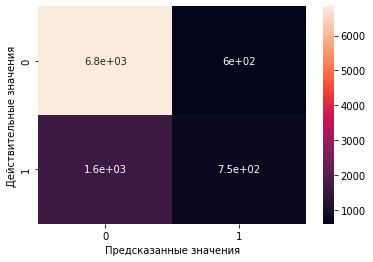

In [15]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Видим, что 0 класс определяется лучше; Вообще, для бинарной классификации гораздо лучше ориентироваться на f-score, но для простоты будем смотреть на accuracy